In [1]:
import dash
from dash import dcc
from dash import html
import dash_split_pane
import plotly.express as px
import pandas as pd
from datetime import datetime
import plotly.graph_objs as go
from dash.dependencies import Input, Output
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

#!pip install dash_daq
import dash_daq as daq

import shap

from sklearn import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, fbeta_score, confusion_matrix, auc

import plotly.figure_factory as ff

import joblib
from joblib import load

import base64
from PIL import Image

from shap.plots._force_matplotlib import draw_additive_plot
from dash import dash_table

from flask import Flask, render_template, jsonify
import json
import requests

Avant de passer au dashboard en lui même nous allons commencer par charger les données dont nous aurons besoin par la suite:

### Chargement de X_test et y_test

In [2]:
X_test = joblib.load(r'C:\Users\Alexis\X_test2.joblib')
y_test = joblib.load(r'C:\Users\Alexis\y_test2.joblib')
target_train = joblib.load(r'C:\Users\Alexis\target_train.joblib')

dataframeInfoXTest = joblib.load(r'C:\Users\Alexis\dataframeInfoXTest.joblib')

In [3]:
X_test.head(5)

,CNT_INSTALMENT_MEAN_YEAR_0_MAX,CNT_PAYMENT_MEAN_ALL,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN_OVERALL_INCOME_RATIO,EXT_SOURCE_MEAN_MAX_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,PRODUCT_COMBINATION_MEAN_ALL,NAME_CASH_LOAN_PURPOSE_LAST_FIRST_2,INTEREST_DOWNPAYMENT_MEAN_LAST_5,AMT_ANNUITY_MIN_AGG_FLAG_OWN_CAR_FLAG_OWN_REALTY_NAME_INCOME_TYPE,TOTAL_TERM_MAX_YEAR_0_MEAN,...,CNT_PAYMENT_MAX_FIRST_2,AMT_INSTALMENT_MEAN_LAST_1_YEAR,ANNUITY_MAX_FIRST_2,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM_CREDITACTIVE_ACTIVE_INCOME_RATIO,AMT_INTEREST_SUM_ALL,AMT_ANNUITY_MAX_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,NAME_EDUCATION_TYPE_0,BUREAU_DAYS_CREDIT_MIN_CREDITACTIVE_CLOSED_REGISTRATION_DIFF,AMT_CREDIT_APPLICATION_RATIO_MEAN_LAST_5,NAME_TYPE_SUITE_LAST_LAST_5
184608,0.430521,-0.096320,-0.01715,0.426864,0.009021,-0.233710,0.435254,0.035926,-0.547145,0.284276,...,-0.339607,0.187709,-0.245740,-0.010556,0.110269,-1.446482,-0.552095,2.170971,-0.001803,0.821354
96297,0.171067,1.066141,-0.01715,-0.226982,0.009021,0.410536,0.435254,-0.122705,0.009991,0.359937,...,1.417432,0.608252,-0.245740,-0.010556,1.403370,-0.550867,1.732452,-0.011400,-0.001804,-0.321186
181702,-0.261357,-1.753850,-0.01715,0.699300,0.009021,0.816662,-0.319650,-0.122705,-1.197136,-0.321016,...,-1.510966,-0.204871,8.958207,-0.010556,-1.243923,0.765867,1.732452,-1.758859,-0.001804,-0.321186
65018,0.517006,-0.403834,-0.01715,-1.044290,0.009021,0.917201,0.435254,-0.157835,-0.446551,0.284276,...,-0.339607,-0.174862,1.919894,-0.010556,-0.234485,1.538516,-0.552095,0.769879,-0.001804,0.821354
285016,0.456196,0.256893,-0.01715,1.271416,0.009021,-0.436112,-0.319650,0.057157,0.009991,0.788685,...,-0.534833,3.025000,-0.245740,-0.010556,0.213317,-0.434217,-1.835197,-0.103200,-0.001803,-0.321186


In [4]:
X_test = X_test.reset_index()

In [5]:
X_test.drop('index', axis = 1, inplace = True)

In [6]:
X_test.shape

(92253, 944)

In [7]:
y_test.head(5)

184608    0
96297     0
181702    0
65018     0
285016    0
Name: TARGET, dtype: int64

In [8]:
target_train.shape

(307507, 1)

In [9]:
dataframeInfoXTest.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
184608,313983,Cash loans,NaN,Pensioner,M,Married,N,Y,Secondary / secondary special,XNA,0,225000.0,1305909.0,41134.5
96297,211800,Cash loans,Core staff,Working,F,Married,N,Y,Secondary / secondary special,Hotel,2,270000.0,781920.0,40054.5
181702,310609,Cash loans,Core staff,Commercial associate,F,Single / not married,Y,Y,Secondary / secondary special,Trade: type 7,0,112500.0,1267735.5,33570.0
65018,175399,Cash loans,NaN,Commercial associate,F,Married,Y,Y,Secondary / secondary special,Agriculture,0,135000.0,405000.0,20250.0
285016,430089,Cash loans,NaN,Pensioner,F,Married,N,Y,Secondary / secondary special,XNA,0,180000.0,450000.0,27193.5


In [10]:
dataframeInfoXTest['OCCUPATION_TYPE'] = dataframeInfoXTest['OCCUPATION_TYPE'].fillna('Non Renseigné')

In [11]:
dataframeInfoXTest['TARGET'] = target_train['TARGET']

In [12]:
listeIndex = dataframeInfoXTest['SK_ID_CURR'].tolist()

In [13]:
listeIndexSort = sorted(listeIndex)

In [14]:
X_testID = X_test.copy() 

In [15]:
X_testID.insert(0, 'ID', listeIndex)

In [16]:
X_testID.head(5)

,ID,CNT_INSTALMENT_MEAN_YEAR_0_MAX,CNT_PAYMENT_MEAN_ALL,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN_OVERALL_INCOME_RATIO,EXT_SOURCE_MEAN_MAX_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,PRODUCT_COMBINATION_MEAN_ALL,NAME_CASH_LOAN_PURPOSE_LAST_FIRST_2,INTEREST_DOWNPAYMENT_MEAN_LAST_5,AMT_ANNUITY_MIN_AGG_FLAG_OWN_CAR_FLAG_OWN_REALTY_NAME_INCOME_TYPE,...,CNT_PAYMENT_MAX_FIRST_2,AMT_INSTALMENT_MEAN_LAST_1_YEAR,ANNUITY_MAX_FIRST_2,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM_CREDITACTIVE_ACTIVE_INCOME_RATIO,AMT_INTEREST_SUM_ALL,AMT_ANNUITY_MAX_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,NAME_EDUCATION_TYPE_0,BUREAU_DAYS_CREDIT_MIN_CREDITACTIVE_CLOSED_REGISTRATION_DIFF,AMT_CREDIT_APPLICATION_RATIO_MEAN_LAST_5,NAME_TYPE_SUITE_LAST_LAST_5
0,313983,0.430521,-0.096320,-0.01715,0.426864,0.009021,-0.233710,0.435254,0.035926,-0.547145,...,-0.339607,0.187709,-0.245740,-0.010556,0.110269,-1.446482,-0.552095,2.170971,-0.001803,0.821354
1,211800,0.171067,1.066141,-0.01715,-0.226982,0.009021,0.410536,0.435254,-0.122705,0.009991,...,1.417432,0.608252,-0.245740,-0.010556,1.403370,-0.550867,1.732452,-0.011400,-0.001804,-0.321186
2,310609,-0.261357,-1.753850,-0.01715,0.699300,0.009021,0.816662,-0.319650,-0.122705,-1.197136,...,-1.510966,-0.204871,8.958207,-0.010556,-1.243923,0.765867,1.732452,-1.758859,-0.001804,-0.321186
3,175399,0.517006,-0.403834,-0.01715,-1.044290,0.009021,0.917201,0.435254,-0.157835,-0.446551,...,-0.339607,-0.174862,1.919894,-0.010556,-0.234485,1.538516,-0.552095,0.769879,-0.001804,0.821354
4,430089,0.456196,0.256893,-0.01715,1.271416,0.009021,-0.436112,-0.319650,0.057157,0.009991,...,-0.534833,3.025000,-0.245740,-0.010556,0.213317,-0.434217,-1.835197,-0.103200,-0.001803,-0.321186


Maintenant chargeons les différents résultats que l'on a pu récupérer via l'entraînement des différents modèles, comme les variables y_pred et y_predProba qui nous servirons à tracer les matrices de confusion et la courbe Roc-Auc notamment:

Nous créerons également des dictionnaires pour accéder rapidement aux valeurs en fonction des options choisies:

In [17]:
dictPred = {}
dictProba = {}

#### Pour les différents modèles de Random Forest

In [18]:
y_pred_clf = joblib.load(r'C:\Users\Alexis\y_pred_clf.joblib')
dictPred['y_pred_clf'] = y_pred_clf
y_predProba_clf = joblib.load(r'C:\Users\Alexis\y_predProba_clf.joblib')
dictProba['y_predProba_clf'] = y_predProba_clf

y_pred_rfc = joblib.load(r'C:\Users\Alexis\y_pred_rfc.joblib')
dictPred['y_pred_rfc'] = y_pred_rfc
y_predProba_rfc = joblib.load(r'C:\Users\Alexis\y_predProba_rfc.joblib')
dictProba['y_predProba_rfc'] = y_predProba_rfc

y_pred_grid_searchRFRSMOTE1 = joblib.load(r'C:\Users\Alexis\y_pred_grid_searchRFRSMOTE1.joblib')
dictPred['y_pred_grid_searchRFRSMOTE1'] = y_pred_grid_searchRFRSMOTE1
y_predProba_grid_searchRFRSMOTE1 = joblib.load(r'C:\Users\Alexis\y_predProba_grid_searchRFRSMOTE1.joblib')
dictProba['y_predProba_grid_searchRFRSMOTE1'] = y_predProba_grid_searchRFRSMOTE1

y_pred_grid_searchRFR = joblib.load(r'C:\Users\Alexis\y_pred_grid_searchRFR.joblib')
dictPred['y_pred_grid_searchRFR'] = y_pred_grid_searchRFR
y_predProba_grid_searchRFR = joblib.load(r'C:\Users\Alexis\y_predProba_grid_searchRFR.joblib')
dictProba['y_predProba_grid_searchRFR'] = y_predProba_grid_searchRFR

#### Pour les différents modèles de XGBoost

In [19]:
y_pred_xgb = joblib.load(r'C:\Users\Alexis\y_pred_xgb.joblib')
dictPred['y_pred_xgb'] = y_pred_xgb
y_predProba_xgb = joblib.load(r'C:\Users\Alexis\y_predProba_xgb.joblib')
dictProba['y_predProba_xgb'] = y_predProba_xgb

y_pred_xgbGrid = joblib.load(r'C:\Users\Alexis\y_pred_xgbGrid.joblib')
dictPred['y_pred_xgbGrid'] = y_pred_xgbGrid
y_predProba_xgbGrid = joblib.load(r'C:\Users\Alexis\y_predProba_xgbGrid.joblib')
dictProba['y_predProba_xgbGrid'] = y_predProba_xgbGrid

y_pred_grid_searchXGBSMOTE1 = joblib.load(r'C:\Users\Alexis\y_pred_grid_searchXGBSMOTE1.joblib')
dictPred['y_pred_grid_searchXGBSMOTE1'] = y_pred_grid_searchXGBSMOTE1
y_predProba_grid_searchXGBSMOTE1 = joblib.load(r'C:\Users\Alexis\y_predProba_grid_searchXGBSMOTE1.joblib')
dictProba['y_predProba_grid_searchXGBSMOTE1'] = y_predProba_grid_searchXGBSMOTE1

y_pred_grid_searchXGB = joblib.load(r'C:\Users\Alexis\y_pred_grid_searchXGB.joblib')
dictPred['y_pred_grid_searchXGB'] = y_pred_grid_searchXGB
y_predProba_grid_searchXGB = joblib.load(r'C:\Users\Alexis\y_predProba_grid_searchXGB.joblib')
dictProba['y_predProba_grid_searchXGB'] = y_predProba_grid_searchXGB

#### Pour les différents modèles de LightGBM

In [20]:
y_pred_lgbm = joblib.load(r'C:\Users\Alexis\y_pred_lgbm.joblib')
dictPred['y_pred_lgbm'] = y_pred_lgbm
y_predProba_lgbm = joblib.load(r'C:\Users\Alexis\y_predProba_lgbm.joblib')
dictProba['y_predProba_lgbm'] = y_predProba_lgbm

y_pred_lgbmGrid = joblib.load(r'C:\Users\Alexis\y_pred_lgbmGrid.joblib')
dictPred['y_pred_lgbmGrid'] = y_pred_lgbmGrid
y_predProba_lgbmGrid = joblib.load(r'C:\Users\Alexis\y_predProba_lgbmGrid.joblib')
dictProba['y_predProba_lgbmGrid'] = y_predProba_lgbmGrid

y_pred_grid_searchLGBMSMOTE1 = joblib.load(r'C:\Users\Alexis\y_pred_grid_searchLGBMSMOTE1.joblib')
dictPred['y_pred_grid_searchLGBMSMOTE1'] = y_pred_grid_searchLGBMSMOTE1
y_predProba_grid_searchLGBMSMOTE1 = joblib.load(r'C:\Users\Alexis\y_predProba_grid_searchLGBMSMOTE1.joblib')
dictProba['y_predProba_grid_searchLGBMSMOTE1'] = y_predProba_grid_searchLGBMSMOTE1

y_pred_grid_searchLGBM = joblib.load(r'C:\Users\Alexis\y_pred_grid_searchLGBM.joblib')
dictPred['y_pred_grid_searchLGBM'] = y_pred_grid_searchLGBM
y_predProba_grid_searchLGBM = joblib.load(r'C:\Users\Alexis\y_predProba_grid_searchLGBM.joblib')
dictProba['y_predProba_grid_searchLGBM'] = y_predProba_grid_searchLGBM

#### Pour HyperOpt

In [21]:
y_pred_lgbmHP = joblib.load(r'C:\Users\Alexis\y_pred_lgbmHP.joblib')
dictPred['y_pred_lgbmHP'] = y_pred_lgbmHP
y_predProba_lgbmHP = joblib.load(r'C:\Users\Alexis\y_predProba_lgbmHP.joblib')
dictProba['y_predProba_lgbmHP'] = y_predProba_lgbmHP

y_pred_lgbmHPF1 = joblib.load(r'C:\Users\Alexis\y_pred_lgbmHPF1.joblib')
dictPred['y_pred_lgbmHPF1'] = y_pred_lgbmHPF1
y_predProba_lgbmHPF1 = joblib.load(r'C:\Users\Alexis\y_predProba_lgbmHPF1.joblib')
dictProba['y_predProba_lgbmHPF1'] = y_predProba_lgbmHPF1

y_pred_lgbmHPSMOTE = joblib.load(r'C:\Users\Alexis\y_pred_lgbmHPSMOTE.joblib')
dictPred['y_pred_lgbmHPSMOTE'] = y_pred_lgbmHPSMOTE
y_predProba_lgbmHPSMOTE = joblib.load(r'C:\Users\Alexis\y_predProba_lgbmHPSMOTE.joblib')
dictProba['y_predProba_lgbmHPSMOTE'] = y_predProba_lgbmHPSMOTE

#### Pour le meilleur modèle avec recherche du seuil

In [22]:
y_predSeuil10 = joblib.load(r'C:\Users\Alexis\y_predSeuil10.joblib')
dictPred['y_predSeuil10'] = y_predSeuil10
y_predProba_lgbmHPSeuil = joblib.load(r'C:\Users\Alexis\y_predProba_lgbmHPSeuil.joblib')
dictProba['y_predProba_lgbmHPSeuil'] = y_predProba_lgbmHPSeuil

y_predSeuil35 = joblib.load(r'C:\Users\Alexis\y_predSeuil35.joblib')
dictPred['y_predSeuil35'] = y_predSeuil35
y_predProba_lgbmHPSeuil35 = joblib.load(r'C:\Users\Alexis\y_predProba_lgbmHPSeuil35.joblib')
dictProba['y_predProba_lgbmHPSeuil35'] = y_predProba_lgbmHPSeuil35

y_predSeuil80 = joblib.load(r'C:\Users\Alexis\y_predSeuil80.joblib')
dictPred['y_predSeuil80'] = y_predSeuil80
y_predProba_lgbmHPSeuil80 = joblib.load(r'C:\Users\Alexis\y_predProba_lgbmHPSeuil80.joblib')
dictProba['y_predProba_lgbmHPSeuil80'] = y_predProba_lgbmHPSeuil80

Faisons un rapide dataframe afin d'accéder rapidement au fichier nécessaire:

In [23]:
listeModele = ['Random Forest', 'XGBoost', 'LightGBM']
listeRecherche = ['Par défaut', 'GridSearchCV', 'GridSearchCV avec SMOTE', 'GridSearchCV avec SMOTE et SE']
listeRechercheHP = ['HyperOpt avec Optimisation score Roc-Auc', 'HyperOpt avec Optimisation score F1', 'HyperOpt avec SMOTE']
listeRechercheSeuil = ['Seuil = 0.10', 'Seuil = 0.35', 'Seuil = 0.80']
listeSeuil = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]

In [24]:
pred = np.array([['y_pred_clf', 'y_pred_xgb', 'y_pred_lgbm'], ['y_pred_rfc', 'y_pred_xgbGrid', 'y_pred_lgbmGrid'], ['y_pred_grid_searchRFRSMOTE1', 'y_pred_grid_searchXGBSMOTE1', 'y_pred_grid_searchLGBMSMOTE1'], ['y_pred_grid_searchRFR', 'y_pred_grid_searchXGB', 'y_pred_grid_searchLGBM']])
dfPred = pd.DataFrame(pred, index = listeRecherche, columns = listeModele)

In [25]:
dfPred

,Random Forest,XGBoost,LightGBM
Par défaut,y_pred_clf,y_pred_xgb,y_pred_lgbm
GridSearchCV,y_pred_rfc,y_pred_xgbGrid,y_pred_lgbmGrid
GridSearchCV avec SMOTE,y_pred_grid_searchRFRSMOTE1,y_pred_grid_searchXGBSMOTE1,y_pred_grid_searchLGBMSMOTE1
GridSearchCV avec SMOTE et SE,y_pred_grid_searchRFR,y_pred_grid_searchXGB,y_pred_grid_searchLGBM


In [26]:
predProba = np.array([['y_predProba_clf', 'y_predProba_xgb', 'y_predProba_lgbm'], ['y_predProba_rfc', 'y_predProba_xgbGrid', 'y_predProba_lgbmGrid'], ['y_predProba_grid_searchRFRSMOTE1', 'y_predProba_grid_searchXGBSMOTE1', 'y_predProba_grid_searchLGBMSMOTE1'], ['y_predProba_grid_searchRFR', 'y_predProba_grid_searchXGB', 'y_predProba_grid_searchLGBM']])
dfPredProba = pd.DataFrame(predProba, index = listeRecherche, columns = listeModele)

In [27]:
dfPredProba

,Random Forest,XGBoost,LightGBM
Par défaut,y_predProba_clf,y_predProba_xgb,y_predProba_lgbm
GridSearchCV,y_predProba_rfc,y_predProba_xgbGrid,y_predProba_lgbmGrid
GridSearchCV avec SMOTE,y_predProba_grid_searchRFRSMOTE1,y_predProba_grid_searchXGBSMOTE1,y_predProba_grid_searchLGBMSMOTE1
GridSearchCV avec SMOTE et SE,y_predProba_grid_searchRFR,y_predProba_grid_searchXGB,y_predProba_grid_searchLGBM


In [28]:
predHD = np.array([['y_pred_lgbmHP', 'y_pred_lgbmHPF1', 'y_pred_lgbmHPSMOTE']])
dfPredHD = pd.DataFrame(predHD, columns = listeRechercheHP)

In [29]:
dfPredHD

,HyperOpt avec Optimisation score Roc-Auc,HyperOpt avec Optimisation score F1,HyperOpt avec SMOTE
0,y_pred_lgbmHP,y_pred_lgbmHPF1,y_pred_lgbmHPSMOTE


In [30]:
predProbaHD = np.array([['y_predProba_lgbmHP', 'y_predProba_lgbmHPF1', 'y_predProba_lgbmHPSMOTE']])
dfPredProbaHD = pd.DataFrame(predProbaHD, columns = listeRechercheHP)

In [31]:
dfPredProbaHD

,HyperOpt avec Optimisation score Roc-Auc,HyperOpt avec Optimisation score F1,HyperOpt avec SMOTE
0,y_predProba_lgbmHP,y_predProba_lgbmHPF1,y_predProba_lgbmHPSMOTE


In [32]:
predSeuil = np.array([['y_predSeuil10', 'y_predSeuil35', 'y_predSeuil80']])
dfPredSeuil = pd.DataFrame(predSeuil, columns = listeRechercheSeuil)

In [33]:
dfPredSeuil

,Seuil = 0.10,Seuil = 0.35,Seuil = 0.80
0,y_predSeuil10,y_predSeuil35,y_predSeuil80


In [34]:
predProbaSeuil = np.array([['y_predProba_lgbmHPSeuil', 'y_predProba_lgbmHPSeuil35', 'y_predProba_lgbmHPSeuil80']])
dfPredProbaSeuil = pd.DataFrame(predProbaSeuil, columns = listeRechercheSeuil)

In [35]:
dfPredProbaSeuil

,Seuil = 0.10,Seuil = 0.35,Seuil = 0.80
0,y_predProba_lgbmHPSeuil,y_predProba_lgbmHPSeuil35,y_predProba_lgbmHPSeuil80


In [36]:
def coutMetier(y_test, y_pred, fn_value = 10, fp_value = 1):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()    
    scoreMetier = fn*fn_value + fp*fp_value
    return scoreMetier

Après ça nous devons finalement prédire pour les différents clients s'ils peuvent recevoir un crédit ou non en fonction de leur dossier (différentes variables du dataset).

In [37]:
X_testID['Prediction'] = y_predSeuil10
X_testID['Score prediction'] = y_predSeuil10
X_testID['Score prediction proba'] = y_predProba_lgbmHPSeuil

In [38]:
map_prediction = {0 : 'Oui',
                  1 : 'Non'} 

In [39]:
X_testID['Prediction'] = X_testID['Prediction'].map(map_prediction)

In [40]:
X_testID.head(5)

,ID,CNT_INSTALMENT_MEAN_YEAR_0_MAX,CNT_PAYMENT_MEAN_ALL,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN_OVERALL_INCOME_RATIO,EXT_SOURCE_MEAN_MAX_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,PRODUCT_COMBINATION_MEAN_ALL,NAME_CASH_LOAN_PURPOSE_LAST_FIRST_2,INTEREST_DOWNPAYMENT_MEAN_LAST_5,AMT_ANNUITY_MIN_AGG_FLAG_OWN_CAR_FLAG_OWN_REALTY_NAME_INCOME_TYPE,...,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM_CREDITACTIVE_ACTIVE_INCOME_RATIO,AMT_INTEREST_SUM_ALL,AMT_ANNUITY_MAX_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,NAME_EDUCATION_TYPE_0,BUREAU_DAYS_CREDIT_MIN_CREDITACTIVE_CLOSED_REGISTRATION_DIFF,AMT_CREDIT_APPLICATION_RATIO_MEAN_LAST_5,NAME_TYPE_SUITE_LAST_LAST_5,Prediction,Score prediction,Score prediction proba
0,313983,0.430521,-0.096320,-0.01715,0.426864,0.009021,-0.233710,0.435254,0.035926,-0.547145,...,-0.010556,0.110269,-1.446482,-0.552095,2.170971,-0.001803,0.821354,Oui,0.0,0.023039
1,211800,0.171067,1.066141,-0.01715,-0.226982,0.009021,0.410536,0.435254,-0.122705,0.009991,...,-0.010556,1.403370,-0.550867,1.732452,-0.011400,-0.001804,-0.321186,Oui,0.0,0.099654
2,310609,-0.261357,-1.753850,-0.01715,0.699300,0.009021,0.816662,-0.319650,-0.122705,-1.197136,...,-0.010556,-1.243923,0.765867,1.732452,-1.758859,-0.001804,-0.321186,Oui,0.0,0.026797
3,175399,0.517006,-0.403834,-0.01715,-1.044290,0.009021,0.917201,0.435254,-0.157835,-0.446551,...,-0.010556,-0.234485,1.538516,-0.552095,0.769879,-0.001804,0.821354,Oui,0.0,0.018452
4,430089,0.456196,0.256893,-0.01715,1.271416,0.009021,-0.436112,-0.319650,0.057157,0.009991,...,-0.010556,0.213317,-0.434217,-1.835197,-0.103200,-0.001803,-0.321186,Oui,0.0,0.084265


Nous pouvons maintenant nous attaquer au dashboard.

In [41]:
X_testID.shape

(92253, 948)

In [42]:
listeIndex = X_testID.reset_index()
listeIndex2 = listeIndex.index.tolist()
X_testID['index'] = listeIndex2
X_testID.head(5)

,ID,CNT_INSTALMENT_MEAN_YEAR_0_MAX,CNT_PAYMENT_MEAN_ALL,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN_OVERALL_INCOME_RATIO,EXT_SOURCE_MEAN_MAX_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,PRODUCT_COMBINATION_MEAN_ALL,NAME_CASH_LOAN_PURPOSE_LAST_FIRST_2,INTEREST_DOWNPAYMENT_MEAN_LAST_5,AMT_ANNUITY_MIN_AGG_FLAG_OWN_CAR_FLAG_OWN_REALTY_NAME_INCOME_TYPE,...,AMT_INTEREST_SUM_ALL,AMT_ANNUITY_MAX_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,NAME_EDUCATION_TYPE_0,BUREAU_DAYS_CREDIT_MIN_CREDITACTIVE_CLOSED_REGISTRATION_DIFF,AMT_CREDIT_APPLICATION_RATIO_MEAN_LAST_5,NAME_TYPE_SUITE_LAST_LAST_5,Prediction,Score prediction,Score prediction proba,index
0,313983,0.430521,-0.096320,-0.01715,0.426864,0.009021,-0.233710,0.435254,0.035926,-0.547145,...,0.110269,-1.446482,-0.552095,2.170971,-0.001803,0.821354,Oui,0.0,0.023039,0
1,211800,0.171067,1.066141,-0.01715,-0.226982,0.009021,0.410536,0.435254,-0.122705,0.009991,...,1.403370,-0.550867,1.732452,-0.011400,-0.001804,-0.321186,Oui,0.0,0.099654,1
2,310609,-0.261357,-1.753850,-0.01715,0.699300,0.009021,0.816662,-0.319650,-0.122705,-1.197136,...,-1.243923,0.765867,1.732452,-1.758859,-0.001804,-0.321186,Oui,0.0,0.026797,2
3,175399,0.517006,-0.403834,-0.01715,-1.044290,0.009021,0.917201,0.435254,-0.157835,-0.446551,...,-0.234485,1.538516,-0.552095,0.769879,-0.001804,0.821354,Oui,0.0,0.018452,3
4,430089,0.456196,0.256893,-0.01715,1.271416,0.009021,-0.436112,-0.319650,0.057157,0.009991,...,0.213317,-0.434217,-1.835197,-0.103200,-0.001803,-0.321186,Oui,0.0,0.084265,4


In [43]:
colonneNumériqueTrain = X_testID.select_dtypes(['int64','float64']).columns

In [44]:
# print the JS visualization code to the notebook
shap.initjs()

In [45]:
lgbmHPSeuil = joblib.load(r'C:\Users\Alexis\lgbmHPSeuil.joblib')

In [46]:
explainer = shap.TreeExplainer(lgbmHPSeuil)
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [47]:
explainer.expected_value

[2.995500750241902, -2.995500750241902]

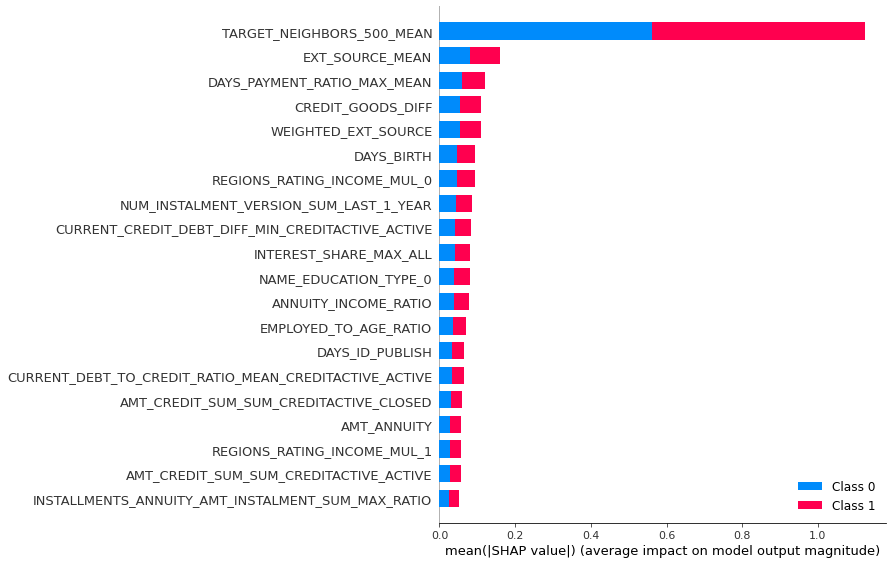

In [48]:
shap.summary_plot(shap_values, X_test)

In [49]:
image_filename = r'C:\Users\Alexis\featureglobal.png'
encoded_image = base64.b64encode(open(image_filename, 'rb').read())

In [50]:
image_filename = 'C:/Users/Alexis/featurelocal.png'

def ouvertureImageFilename(image_filename):    
    with open(image_filename, 'rb') as f: image = f.read()    
    return 'data:image/png;base64,' + base64.b64encode(image).decode('utf-8')

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_predProba_lgbmHPSeuil)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = 1 - thresholds[optimal_idx]

print("Le seuil optimal est égal à", round(optimal_threshold, 3))

Le seuil optimal est égal à 0.916


# Dashboard

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Dec/2021 00:38:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 00:38:54] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 00:38:54] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 00:38:54] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 00:38:54] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 00:38:54] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 00:38:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 00:38:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 00:38:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 00:38:58] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 00:39:05] "POST /_dash-update-component HTTP/1.

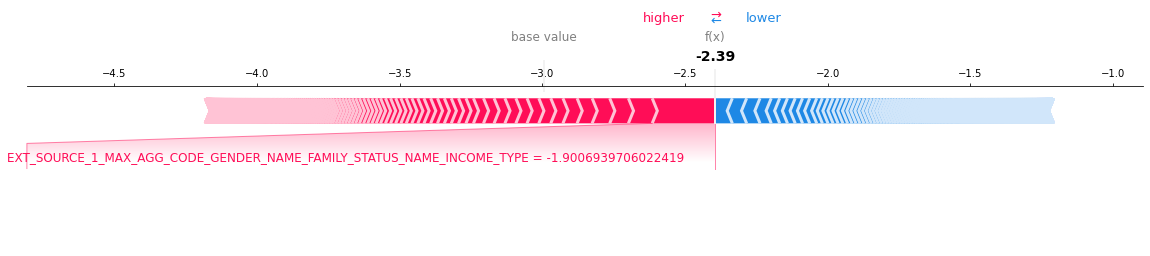

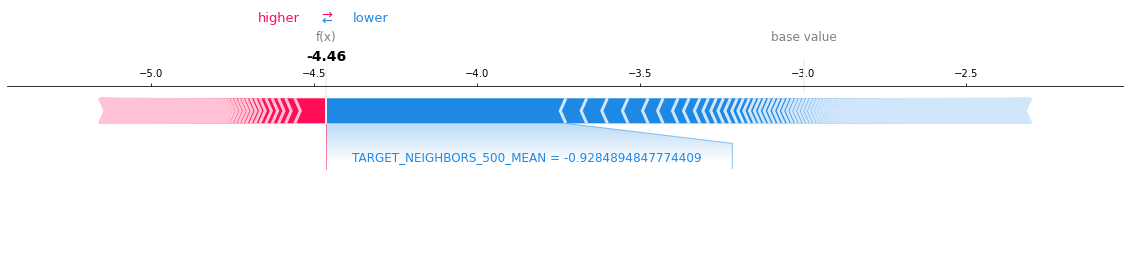

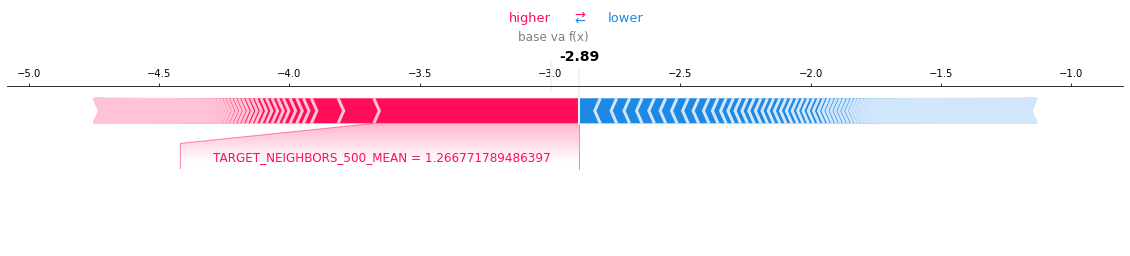

In [59]:
app = dash.Dash(__name__)
app.title = "Dashboard Projet 7" #Assigning title to be displayed on tab

app.layout = html.Div(
    children=[
        html.Div(
            children = [
                 html.H1(
                     children='Dashboard pour le Projet 7: Implémentez un modèle de scoring', 
                     style={'color': '#FFFFFF',
                            'fontSize': '48px',
                            'font-weight': 'bold',
                            'text-align': 'center',
                            'margin': '0 auto'},
                 ),
                 html.P(
                    children='Pour ce projet nous avons étudié différents modèles, ' 
                             'tous basés sur les arbres de décision qui donnent de meilleurs résultats '
                             'de manière générale.',
                    style={'color': '#CFCFCF',                          
                           'max-width': '500px',
                           'text-align': 'center',
                           'margin': '4px auto'},
                ),
            ],
             style={'background-color': '#222222',
                    'height': '105px',
                    'padding': '16px 0 0 0'},
        ), 
       
        html.Div(
            children = [
                 html.H6(
                     children='Prédiction pour les différents clients', 
                     style={'color': '#FFFFFF',
                            'fontSize': '24px',
                            'font-weight': 'bold',
                            'text-align': 'center',
                            'margin': '0 auto'},
                 ),
                 html.P(
                    children='Après avoir récupéré un modèle pour la classification des différents ' 
                             'clients, nous pouvons maintenant les classifier, le but ici sera donc, pour '
                             'chaque client à notre disposition, de définir si nous pouvons lui donner'
                             'son crédit ou non. ',
                    style={'color': '#CFCFCF',                          
                           'max-width': '500px',
                           'text-align': 'center',
                           'margin': '4px auto'},
                ),
                 html.P(
                    children='Si le score est de 0 le client aura tendance à ne pas rembourser le crédit, '
                             'si le score est de 1 il aura tendande a rembourser.',
                    style={'color': '#CFCFCF',                          
                           'max-width': '500px',
                           'text-align': 'center',
                           'margin': '4px auto'},
                ),
            ],
             style={'background-color': '#222222',
                    'height': '250px',
                    'padding': '16px 0 0 0'},
        ),
        html.Div(
            children=[
                html.Div(
                    children=[
                        html.Div(children="Identifiant du client", className="menu-title"),
                        dcc.Dropdown(
                            id="id-client",
                            options=[
                                {"label": IDclient, "value": IDclient}
                                for IDclient in listeIndexSort
                            ],
                            value=listeIndexSort[0],
                            clearable=False,
                            searchable=False,
                            style={'width': '275px'}, 
                        ),
                    ],
                ),
        
            ],
            style={'background-color': '#FFFFFF',
                   'height': '100px',
                   'width': '550px',
                   'display': 'flex',
                   'justify-content': 'space-evenly',
                   'margin': '-80px auto 0 auto',
                   'box-shadow': '0 4px 6px 0 rgba(0, 0, 0, 0.18)',
                   'padding-top': '24px'},
        ),
        html.Div(
            children=[
                html.H6(
                    children = 'Information sur le client',
                    style={'color': '#000000',
                           'fontSize': '24px',
                           'font-weight': 'bold',
                           'text-align': 'left',
                           'margin': '0 auto'},
                ),
            ],
        ),
        html.Div(
            children=[
                html.Div(
                    children=[
                        html.Table([
                            #html.Tr([html.Td(['Genre: ']), html.Td(id='codegender')]),
                            html.Tr([html.Td(['Nombre d\'enfant: ']), html.Td(id='cntchildren')]),
                            html.Tr([html.Td(['Revenu: ']), html.Td(id='amtincometotal')]),
                            html.Tr([html.Td(['Montant du crédit: ']), html.Td(id='amtcredit')]),
                            html.Tr([html.Td(['Annuité de prêt: ']), html.Td(id='amtannuity')]),
                            html.Tr([html.Td(['Durée du remboursement: ']), html.Td(id='dureeremboursement')]),
                            #html.Tr([html.Td(['Type de revenu du client: ']), html.Td(id='nameincometype')]),
                            #html.Tr([html.Td(['Situation familiale du client: ']), html.Td(id='namefamilystatus')]),
                            #html.Tr([html.Td(['Prêt en espèce ou renouvable: ']), html.Td(id='namecontracttype')]),                            
                        ]),
                    ],                            
                ),
            ],
        ),
        html.Div(
            children=[
                html.H6(
                    children = 'Score de la prédiction',
                    style={'color': '#000000',
                           'fontSize': '24px',
                           'font-weight': 'bold',
                           'text-align': 'left',
                           'display': 'flex',
                           'justify-content': 'space-evenly',
                           'text-align': 'center',
                           'margin': '25px auto 0 auto'},
                ),
            ],
        ),
        html.Div(
            children=[
                html.Table([
                    html.Tr([html.Td(['Le client reçoit son crédit: ']), html.Td(id='crédit')]),
                    html.Tr([html.Td(['(Le seuil optimal est égal à ', round(optimal_threshold, 3), ')'])]),
                    #html.Br(),
                    #html.Tr([html.Td(['TARGET: ']), html.Td(id='target')]),
                    #html.Tr([html.Td(['Score prediction: ']), html.Td(id='scorePred')]),
                    #html.Tr([html.Td(['Score prediction proba: ']), html.Td(id='scoreProba')]),
                ]),                
            ],
            style={'color': '#000000',                          
                   'display': 'flex',
                   'justify-content': 'space-evenly',
                   'text-align': 'center',
                   'margin': '25px auto 0 auto'},                            
        ),
        html.Div(
            children=[
                 dcc.Graph(id = 'figureGauge')             
            ],
            style={'color': '#000000',                          
                   'display': 'flex',
                   'justify-content': 'space-evenly',
                   'text-align': 'center',
                   'margin': '25px auto 0 auto'},                            
        ),
        html.Div(
            children=[
                html.H6(
                    children = 'Les features les plus importantes',
                    style={'color': '#000000',
                           'fontSize': '24px',
                           'font-weight': 'bold',
                           'text-align': 'left',
                           'display': 'flex',
                           'justify-content': 'space-evenly',
                           'text-align': 'center',
                           'margin': '25px auto 0 auto'},
                ),
            ],
        ),
        html.Div(
            children=[
                html.Table([
                    html.Tr([html.Td(['Les meilleurs features globales']), html.Td(id='featureglobal')]),
                ]),                
            ],                
            style={'color': '#000000',                          
                   'display': 'flex',
                   'justify-content': 'space-evenly',
                   'text-align': 'center',
                   'margin': '25px auto 0 auto'},       
                                   
        ),
        html.Div(
            html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode()), height='500', width='500'),
            style={'color': '#000000',                          
                   'display': 'flex',
                   'justify-content': 'space-evenly',
                   'text-align': 'center',
                   'margin': '25px auto 0 auto'}, 
        ),        
        html.Div(
            children=[
                html.Table([
                    html.Tr([html.Td(['Les meilleurs features Locales']), html.Td(id='featurelocal')]),
                ]),                
            ],                
            style={'color': '#000000',                          
                   'display': 'flex',
                   'justify-content': 'space-evenly',
                   'text-align': 'center',
                   'margin': '25px auto 0 auto'},       
                                   
        ),
        html.Div(
            children=[
                 html.Img(id="figurefeaturelocal", src = ouvertureImageFilename(image_filename), height='150', width='750'),
            ],
            style={'color': '#000000',                          
                   'display': 'flex',
                   'justify-content': 'space-evenly',
                   'text-align': 'center',
                   'margin': '25px auto 0 auto'}, 
        ),   
    ],
)



@app.callback(
    [
         Output('crédit', 'children')
         #Output('target', 'children'),
         #Output('scorePred', 'children'),
         #Output('scoreProba', 'children'),
    ],
    [
        Input("id-client", "value")
    ]
)

def prediction(id):

    crédit = X_testID[X_testID['ID'] == id]['Prediction'].values
    #target = dataframeInfoXTest[dataframeInfoXTest['SK_ID_CURR'] == id]['TARGET'].values
    #scorePred = X_testID[X_testID['ID'] == id]['Score prediction'].values
    #scoreProba = X_testID[X_testID['ID'] == id]['Score prediction proba'].values
    
    return [crédit]


@app.callback(
    [
         #Output('codegender', 'children'),
         Output('cntchildren', 'children'),
         Output('amtincometotal', 'children'),
         Output('amtcredit', 'children'),
         Output('amtannuity', 'children'),
         Output('dureeremboursement', 'children')
         #Output('nameincometype', 'children'),
         #Output('namefamilystatus', 'children'),
         #Output('namecontracttype', 'children'),
    ],
    [
        Input("id-client", "value")
    ]
)

def prediction(id):
    
    #codegender = dataframeInfoXTest[dataframeInfoXTest['SK_ID_CURR'] == id]['CODE_GENDER'].values
    cntchildren = dataframeInfoXTest[dataframeInfoXTest['SK_ID_CURR'] == id]['CNT_CHILDREN'].values
    amtincometotal = dataframeInfoXTest[dataframeInfoXTest['SK_ID_CURR'] == id]['AMT_INCOME_TOTAL'].values
    amtcredit = dataframeInfoXTest[dataframeInfoXTest['SK_ID_CURR'] == id]['AMT_CREDIT'].values
    amtannuity = dataframeInfoXTest[dataframeInfoXTest['SK_ID_CURR'] == id]['AMT_ANNUITY'].values
    dureeRemboursement = amtcredit/amtannuity
    #nameincometype = dataframeInfoXTest[dataframeInfoXTest['SK_ID_CURR'] == id]['NAME_INCOME_TYPE'].values
    #namefamilystatus = dataframeInfoXTest[dataframeInfoXTest['SK_ID_CURR'] == id]['NAME_FAMILY_STATUS'].values
    #namecontracttype = dataframeInfoXTest[dataframeInfoXTest['SK_ID_CURR'] == id]['NAME_CONTRACT_TYPE'].values
    
    
    #return codegender, cntchildren, amtincometotal, amtcredit, amtannuity, nameincometype, namefamilystatus, namecontracttype
    return cntchildren, amtincometotal, amtcredit, amtannuity, dureeRemboursement 

@app.callback(
    [
         Output('figureGauge', 'figure')
    ],
    [
        Input("id-client", "value")
    ]
)

def plotfiguregauge(id):
    
    values =  X_testID[X_testID['ID'] == id]['Score prediction proba'].values
    #print(values)
    
    #y_predProba = y_predProba_lgbmHPSeuil.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_predProba_lgbmHPSeuil)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = 1 - thresholds[optimal_idx]
    #print(optimal_threshold)
    
    figureGauge = go.Figure(
                      go.Indicator(
                          mode = "gauge+number+delta",
                          value = float(1 - values),
                          domain = {'x': [0., 1.], 'y': [0., 1.]},
                          title = {'text': "Prediction"},
                          delta = {'reference': float(optimal_threshold), 'increasing': {'color': "RebeccaPurple"}},
                          gauge = {'axis': {'range': [None, 1]},
                                   'steps' : 
                                       [
                                            {'range': [1, float(1 - values)], 'color': "red"},
                                            {'range': [float(1 - values), 0], 'color': "green"}
                                       ],
                                   'threshold': 
                                       {
                                            'line': {'color': "yellow", 'width': 4},
                                            'thickness': 1,
                                            'value': float(optimal_threshold),
                                       },
                          },
                      ),
                  )
    
    figureGauge.update_layout(#autosize = True,
                              font_size = 10,
                              width = 350,
                              height = 350)
    
    
    return [go.Figure(data = figureGauge)]




@app.callback(
    [
         Output('figurefeaturelocal', 'src')
    ],
    [
        Input("id-client", "value")
    ]
)

def plotfigurefeature(id):
    
    values =  X_testID[X_testID['ID'] == id]['index'].values
    #print(values)
    
    shap.force_plot(explainer.expected_value[1], shap_values[1][int(values)], X_test.iloc[[int(values)]], show=False, matplotlib=True)
    plt.savefig(image_filename)
    src = ouvertureImageFilename(image_filename)
    
    return [src]

#==========================================================================================================================#

if __name__ == "__main__":
    app.run_server(debug = False, port = 8080)